In [1]:
import os

project = "ds_RahulRathnavel_k"

os.makedirs(f"{project}/csv_files", exist_ok=True)
os.makedirs(f"{project}/outputs", exist_ok=True)

print("Folder structure created!")


Folder structure created!


In [4]:
!pip install gdown

import gdown

# Trader Data
gdown.download(
    "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs",
    "/content/ds_RahulRathnavel_k/csv_files/trader_data.csv",
    quiet=False
)

# Fear & Greed Index
gdown.download(
    "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf",
    "/content/ds_RahulRathnavel_k/csv_files/fear_greed.csv",
    quiet=False
)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/ds_RahulRathnavel_k/csv_files/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 72.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/ds_RahulRathnavel_k/csv_files/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 14.5MB/s]


'/content/ds_RahulRathnavel_k/csv_files/fear_greed.csv'

In [9]:
import pandas as pd
trades = pd.read_csv("/content/ds_RahulRathnavel_k/csv_files/trader_data.csv")
fg = pd.read_csv("/content/ds_RahulRathnavel_k/csv_files/fear_greed.csv")
print("Columns in 'trades' DataFrame:", trades.columns.tolist())
print("Columns in 'fg' DataFrame:", fg.columns.tolist())

Columns in 'trades' DataFrame: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Columns in 'fg' DataFrame: ['timestamp', 'value', 'classification', 'date']


In [10]:

trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], errors='coerce')

fg['timestamp'] = pd.to_datetime(fg['timestamp'], errors='coerce')
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')

trades['Date'] = trades['Timestamp IST'].fillna(trades['Timestamp']).dt.date

fg['Date'] = fg['date'].fillna(fg['timestamp']).dt.date

trades = trades.dropna(subset=['Date'])
fg = fg.dropna(subset=['Date'])

print("Trades:", trades[['Timestamp IST', 'Timestamp', 'Date']].head())
print("FG:", fg[['timestamp', 'date', 'Date']].head())


Cleaned columns:
Trades:         Timestamp IST           Timestamp        Date
0 2024-02-12 22:50:00 1970-01-01 00:28:50  2024-02-12
1 2024-02-12 22:50:00 1970-01-01 00:28:50  2024-02-12
2 2024-02-12 22:50:00 1970-01-01 00:28:50  2024-02-12
3 2024-02-12 22:50:00 1970-01-01 00:28:50  2024-02-12
4 2024-02-12 22:50:00 1970-01-01 00:28:50  2024-02-12
FG:                       timestamp       date        Date
0 1970-01-01 00:00:01.517463000 2018-02-01  2018-02-01
1 1970-01-01 00:00:01.517549400 2018-02-02  2018-02-02
2 1970-01-01 00:00:01.517635800 2018-02-03  2018-02-03
3 1970-01-01 00:00:01.517722200 2018-02-04  2018-02-04
4 1970-01-01 00:00:01.517808600 2018-02-05  2018-02-05


In [12]:
import requests
import pandas as pd

url = "https://api.alternative.me/fng/?limit=730&format=json"
raw = requests.get(url).json()

fg_new = pd.DataFrame(raw["data"])


fg_new["timestamp"] = pd.to_datetime(fg_new["timestamp"], errors='coerce')


mask = fg_new["timestamp"].isna()
if mask.any():
    fg_new.loc[mask, "timestamp"] = pd.to_datetime(
        fg_new.loc[mask, "timestamp"],
        format="%m-%d-%Y",
        errors="coerce"
    )


fg_new["Date"] = fg_new["timestamp"].dt.date

fg_clean = fg_new[["Date", "value", "value_classification"]]
fg_clean.columns = ["Date", "FG_Value", "FG_Class"]

print("Fixed F&G sample:")
print(fg_clean.head())

print("\nFear & Greed Date Range:", fg_clean["Date"].min(), "to", fg_clean["Date"].max())
print("Trades Date Range:", trades["Date"].min(), "to", trades["Date"].max())


Fixed F&G sample:
  Date FG_Value      FG_Class
0  NaT       29          Fear
1  NaT       29          Fear
2  NaT       26          Fear
3  NaT       22  Extreme Fear
4  NaT       20  Extreme Fear

Fear & Greed Date Range: NaT to NaT
Trades Date Range: 1970-01-01 to 2025-12-04


/tmp/ipython-input-2141513921.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fg_new["timestamp"] = pd.to_datetime(fg_new["timestamp"], errors='coerce')


In [13]:
import requests
import pandas as pd

url = "https://api.alternative.me/fng/?limit=10&format=json"
raw = requests.get(url).json()

print("RAW F&G entries:")
for item in raw["data"][:10]:
    print(item)


RAW F&G entries:
{'value': '29', 'value_classification': 'Fear', 'timestamp': '1765497600', 'time_until_update': '60693'}
{'value': '29', 'value_classification': 'Fear', 'timestamp': '1765411200'}
{'value': '26', 'value_classification': 'Fear', 'timestamp': '1765324800'}
{'value': '22', 'value_classification': 'Extreme Fear', 'timestamp': '1765238400'}
{'value': '20', 'value_classification': 'Extreme Fear', 'timestamp': '1765152000'}
{'value': '20', 'value_classification': 'Extreme Fear', 'timestamp': '1765065600'}
{'value': '23', 'value_classification': 'Extreme Fear', 'timestamp': '1764979200'}
{'value': '28', 'value_classification': 'Fear', 'timestamp': '1764892800'}
{'value': '26', 'value_classification': 'Fear', 'timestamp': '1764806400'}
{'value': '28', 'value_classification': 'Fear', 'timestamp': '1764720000'}


In [14]:
import requests
import pandas as pd
import numpy as np

# Fetch latest FNG data (2 years)
url = "https://api.alternative.me/fng/?limit=730&format=json"
raw = requests.get(url).json()

fg_new = pd.DataFrame(raw["data"])



fg_new = fg_new[fg_new["timestamp"].str.isnumeric()]

fg_new["timestamp"] = fg_new["timestamp"].astype(int)
fg_new["timestamp"] = pd.to_datetime(fg_new["timestamp"], unit='s')

fg_new["Date"] = fg_new["timestamp"].dt.date


fg_clean = fg_new[["Date", "value", "value_classification"]]
fg_clean.columns = ["Date", "FG_Value", "FG_Class"]

print("Clean FG sample:")
print(fg_clean.head())

print("\nFear & Greed Date Range:", fg_clean["Date"].min(), "to", fg_clean["Date"].max())
print("Trades Date Range:", trades["Date"].min(), "to", trades["Date"].max())


Clean FG sample:
         Date FG_Value      FG_Class
0  2025-12-12       29          Fear
1  2025-12-11       29          Fear
2  2025-12-10       26          Fear
3  2025-12-09       22  Extreme Fear
4  2025-12-08       20  Extreme Fear

Fear & Greed Date Range: 2023-12-13 to 2025-12-12
Trades Date Range: 1970-01-01 to 2025-12-04


In [15]:

trades = trades[trades["Date"] > pd.to_datetime("2000-01-01").date()]


merged = pd.merge(
    trades,
    fg_clean,
    on="Date",
    how="left"
)

print("Merged dataset preview:")
print(merged.head())

print("\nMerged shape:", merged.shape)
print("\nRows missing FG values:", merged["FG_Value"].isna().sum())


Merged dataset preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash    

In [16]:
import pandas as pd
import numpy as np


merged["FG_Value"] = pd.to_numeric(merged["FG_Value"], errors='coerce')

def sentiment_category(val):
    if val < 25: return "Extreme Fear"
    elif val < 45: return "Fear"
    elif val < 55: return "Neutral"
    elif val < 75: return "Greed"
    else: return "Extreme Greed"

merged["Sentiment"] = merged["FG_Value"].apply(sentiment_category)


merged["LeverageProxy"] = merged["Size USD"] / merged["Execution Price"]

sentiment_side_counts = merged.groupby(["Sentiment", "Side"]).size().reset_index(name="Count")

sentiment_pnl = merged.groupby("Sentiment")["Closed PnL"].mean().reset_index(name="Avg_PnL")

sentiment_lev = merged.groupby("Sentiment")["LeverageProxy"].mean().reset_index(name="Avg_Leverage")

print("Buy/Sell counts:")
print(sentiment_side_counts.head(), "\n")

print("Average PnL:")
print(sentiment_pnl, "\n")

print("Average Leverage:")
print(sentiment_lev.head())


Buy/Sell counts:
       Sentiment  Side  Count
0   Extreme Fear   BUY   1967
1   Extreme Fear  SELL   3088
2  Extreme Greed   BUY   1671
3  Extreme Greed  SELL   3962
4           Fear   BUY  12399 

Average PnL:
       Sentiment     Avg_PnL
0   Extreme Fear   30.939128
1  Extreme Greed  205.377894
2           Fear   98.400896
3          Greed   47.051003
4        Neutral   35.289778 

Average Leverage:
       Sentiment  Avg_Leverage
0   Extreme Fear   1625.573662
1  Extreme Greed  16372.297679
2           Fear   3364.578586
3          Greed   6696.982615
4        Neutral   6663.299316


In [18]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter

project = "ds_RahulRathnavel_k"
out = f"/content/{project}/outputs"

import os
os.makedirs(out, exist_ok=True)

merged["FG_Value"] = pd.to_numeric(merged["FG_Value"], errors='coerce')
# Use Sentiment mapping used earlier
def sentiment_category(val):
    if pd.isna(val): return "Unknown"
    if val < 25: return "Extreme Fear"
    elif val < 45: return "Fear"
    elif val < 55: return "Neutral"
    elif val < 75: return "Greed"
    else: return "Extreme Greed"
merged["Sentiment"] = merged["FG_Value"].apply(sentiment_category)


if "Timestamp IST" in merged.columns:
    merged["Timestamp_Parsed"] = pd.to_datetime(merged["Timestamp IST"], errors='coerce')
else:
    merged["Timestamp_Parsed"] = pd.to_datetime(merged["Timestamp"], errors='coerce')

order = ["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"]
grouped = merged.groupby(["Sentiment","Side"]).size().unstack(fill_value=0).reindex(order)

plt.figure(figsize=(10,6))
grouped.plot(kind="bar", stacked=True, legend=True)
plt.title("Buy vs Sell Counts by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig(os.path.join(out, "chart_buy_sell_stacked.png"), dpi=300)
plt.close()

pnl_stats = merged.groupby("Sentiment")["Closed PnL"].agg(["mean","std","count"]).reindex(order)
x = np.arange(len(pnl_stats))
means = pnl_stats["mean"].fillna(0)
stds = pnl_stats["std"].fillna(0)

plt.figure(figsize=(10,5))
plt.errorbar(x, means, yerr=stds, fmt='o', capsize=5)
plt.xticks(x, pnl_stats.index, rotation=30)
plt.title("Average Closed PnL by Sentiment (mean ± std)")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.savefig(os.path.join(out, "chart_pnl_errorbar.png"), dpi=300)
plt.close()

merged["Execution Price"] = pd.to_numeric(merged["Execution Price"], errors='coerce').replace(0, np.nan)
merged["LeverageProxy"] = merged["Size USD"].astype(float) / merged["Execution Price"].astype(float)
lev_df = merged.dropna(subset=["LeverageProxy","Sentiment"])
lev_ordered = [lev_df[lev_df["Sentiment"]==s]["LeverageProxy"] for s in order]

plt.figure(figsize=(10,6))
plt.boxplot(lev_ordered, labels=order, showfliers=False)
plt.yscale('symlog')  # leverage can be highly skewed – use symlog for readability
plt.title("Leverage Proxy Distribution by Sentiment (symlog scale)")
plt.ylabel("Leverage Proxy (Size USD / Execution Price)")
plt.tight_layout()
plt.savefig(os.path.join(out, "chart_leverage_boxplot.png"), dpi=300)
plt.close()


daily_trades = merged.copy()
daily_trades["Date_dt"] = pd.to_datetime(daily_trades["Date"])
daily_counts = daily_trades.groupby("Date_dt").size().rename("Trade_Count")

if 'fg_clean' in globals():
    fg_series = fg_clean.set_index(pd.to_datetime(fg_clean["Date"]))["FG_Value"].astype(float)
else:
    fg_series = merged.drop_duplicates(subset=["Date"]).set_index(pd.to_datetime(merged.drop_duplicates(subset=["Date"])["Date"]))["FG_Value"].astype(float)

common_index = pd.date_range(start=min(fg_series.index.min(), daily_counts.index.min()),
                             end=max(fg_series.index.max(), daily_counts.index.max()))
fg_series = fg_series.reindex(common_index).interpolate(limit_direction='both')
daily_counts = daily_counts.reindex(common_index, fill_value=0)

fg_smoothed = fg_series.rolling(window=7, min_periods=1).mean()
counts_smoothed = daily_counts.rolling(window=7, min_periods=1).mean()

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(fg_smoothed.index, fg_smoothed.values)
ax1.set_ylabel("Fear & Greed Index (7-day avg)")
ax1.set_xlabel("Date")
ax1.set_ylim(0,100)
ax2 = ax1.twinx()
ax2.plot(counts_smoothed.index, counts_smoothed.values, alpha=0.4)
ax2.set_ylabel("Daily Trade Count (7-day avg)")
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.title("Fear & Greed Index (smoothed) vs Trade Activity (smoothed)")
fig.tight_layout()
plt.savefig(os.path.join(out, "chart_fg_vs_volume_timeseries.png"), dpi=300)
plt.close()

print("Visuvalisation charts saved to", out)


/tmp/ipython-input-57246076.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(lev_ordered, labels=order, showfliers=False)


Visuvalisation charts saved to /content/ds_RahulRathnavel_k/outputs


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

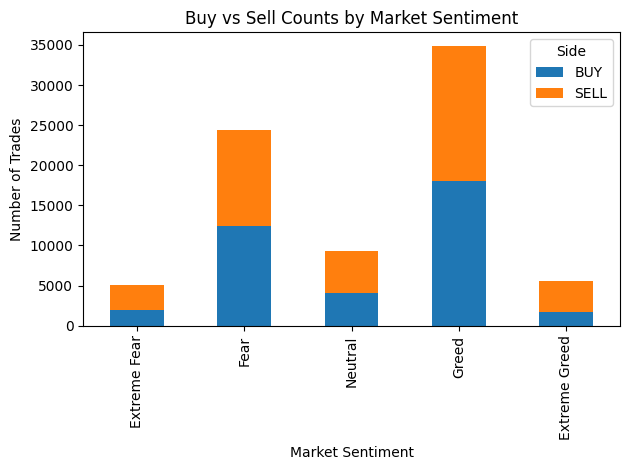

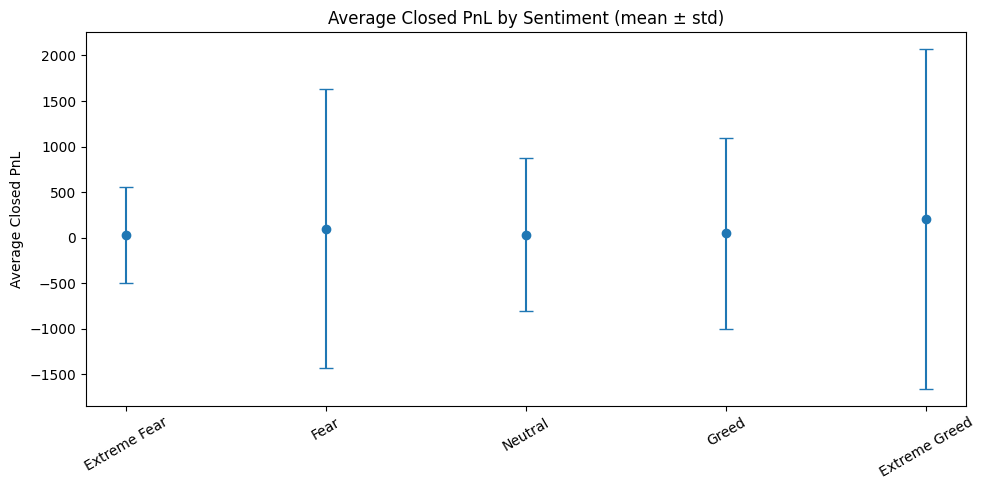

/tmp/ipython-input-3003448699.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(lev_ordered, labels=order, showfliers=False)


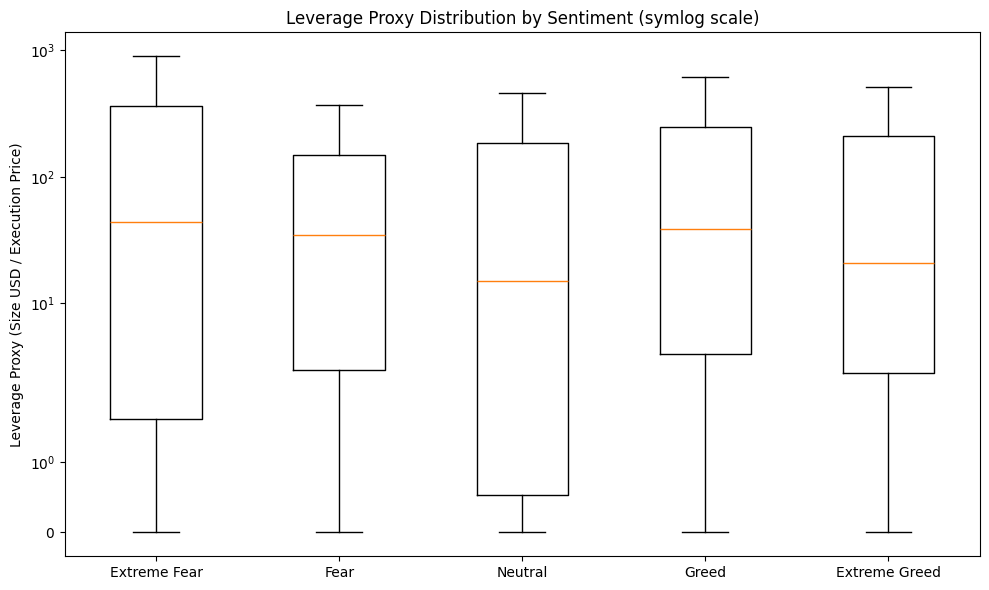

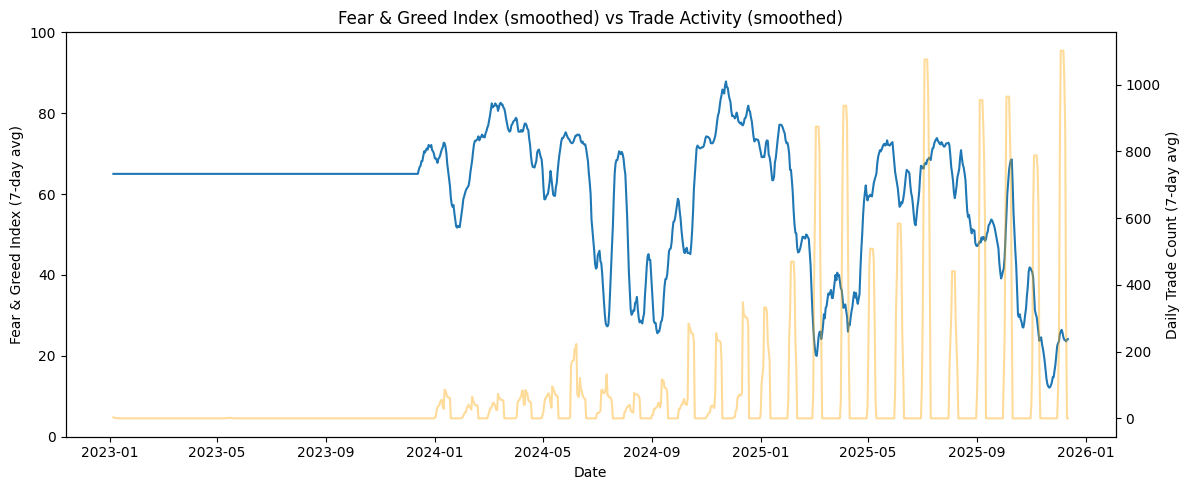

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter

merged["FG_Value"] = pd.to_numeric(merged["FG_Value"], errors='coerce')

def sentiment_category(val):
    if pd.isna(val): return "Unknown"
    if val < 25: return "Extreme Fear"
    elif val < 45: return "Fear"
    elif val < 55: return "Neutral"
    elif val < 75: return "Greed"
    else: return "Extreme Greed"

merged["Sentiment"] = merged["FG_Value"].apply(sentiment_category)

if "Timestamp IST" in merged.columns:
    merged["Timestamp_Parsed"] = pd.to_datetime(merged["Timestamp IST"], errors='coerce')
else:
    merged["Timestamp_Parsed"] = pd.to_datetime(merged["Timestamp"], errors='coerce')

order = ["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"]
grouped = merged.groupby(["Sentiment","Side"]).size().unstack(fill_value=0).reindex(order)

plt.figure(figsize=(10,6))
grouped.plot(kind="bar", stacked=True, legend=True)
plt.title("Buy vs Sell Counts by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()

pnl_stats = merged.groupby("Sentiment")["Closed PnL"].agg(["mean","std","count"]).reindex(order)
x = np.arange(len(pnl_stats))
means = pnl_stats["mean"].fillna(0)
stds = pnl_stats["std"].fillna(0)

plt.figure(figsize=(10,5))
plt.errorbar(x, means, yerr=stds, fmt='o', capsize=5)
plt.xticks(x, pnl_stats.index, rotation=30)
plt.title("Average Closed PnL by Sentiment (mean ± std)")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.show()

merged["Execution Price"] = pd.to_numeric(merged["Execution Price"], errors='coerce').replace(0, np.nan)
merged["LeverageProxy"] = merged["Size USD"].astype(float) / merged["Execution Price"].astype(float)
lev_df = merged.dropna(subset=["LeverageProxy","Sentiment"])
lev_ordered = [lev_df[lev_df["Sentiment"]==s]["LeverageProxy"] for s in order]

plt.figure(figsize=(10,6))
plt.boxplot(lev_ordered, labels=order, showfliers=False)
plt.yscale('symlog')
plt.title("Leverage Proxy Distribution by Sentiment (symlog scale)")
plt.ylabel("Leverage Proxy (Size USD / Execution Price)")
plt.tight_layout()
plt.show()

daily_trades = merged.copy()
daily_trades["Date_dt"] = pd.to_datetime(daily_trades["Date"])
daily_counts = daily_trades.groupby("Date_dt").size().rename("Trade_Count")

if 'fg_clean' in globals():
    fg_series = fg_clean.set_index(pd.to_datetime(fg_clean["Date"]))["FG_Value"].astype(float)
else:
    fg_series = merged.drop_duplicates(subset=["Date"]).set_index(pd.to_datetime(merged.drop_duplicates(subset=["Date"])["Date"]))["FG_Value"].astype(float)

common_index = pd.date_range(start=min(fg_series.index.min(), daily_counts.index.min()),
                             end=max(fg_series.index.max(), daily_counts.index.max()))
fg_series = fg_series.reindex(common_index).interpolate(limit_direction='both')
daily_counts = daily_counts.reindex(common_index, fill_value=0)

fg_smoothed = fg_series.rolling(window=7, min_periods=1).mean()
counts_smoothed = daily_counts.rolling(window=7, min_periods=1).mean()

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(fg_smoothed.index, fg_smoothed.values, label='Fear & Greed (7d Avg)')
ax1.set_ylabel("Fear & Greed Index (7-day avg)")
ax1.set_xlabel("Date")
ax1.set_ylim(0,100)

ax2 = ax1.twinx()
ax2.plot(counts_smoothed.index, counts_smoothed.values, color='orange', alpha=0.4, label='Trade Count (7d Avg)')
ax2.set_ylabel("Daily Trade Count (7-day avg)")

ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.title("Fear & Greed Index (smoothed) vs Trade Activity (smoothed)")
fig.tight_layout()
plt.show()

In [20]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.0 MB/s eta 0:00:00


In [24]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors

order = ["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"]

pnl_stats = (
    merged.groupby("Sentiment")["Closed PnL"]
    .agg(["mean","std","count"])
    .reindex(order)
)

lev_stats = (
    merged.groupby("Sentiment")["LeverageProxy"]
    .agg(["mean","std"])
    .reindex(order)
)

side_counts = (
    merged.groupby(["Sentiment","Side"])
    .size()
    .unstack(fill_value=0)
    .reindex(order)
)

styles = getSampleStyleSheet()
title = Paragraph("Trading Behavior vs. Market Sentiment — Insights Summary", styles["Title"])
space = Spacer(1, 12)

doc = SimpleDocTemplate("/content/insights_summary.pdf", pagesize=letter)
story = [title, space]

story.append(Paragraph("1. Average PnL by Sentiment", styles["Heading2"]))
pnl_table_data = [["Sentiment", "Mean PnL", "Std Dev", "Count"]]
for idx, row in pnl_stats.iterrows():
    pnl_table_data.append([idx, round(row["mean"], 2), round(row["std"], 2), int(row["count"])])
pnl_table = Table(pnl_table_data)
pnl_table.setStyle([("BACKGROUND", (0,0), (-1,0), colors.grey),
                    ("TEXTCOLOR", (0,0), (-1,0), colors.white),
                    ("GRID", (0,0), (-1,-1), 1, colors.black)])
story.append(pnl_table)
story.append(space)

story.append(Paragraph("2. Average Leverage by Sentiment", styles["Heading2"]))
lev_table_data = [["Sentiment", "Mean Leverage", "Std Dev"]]
for idx, row in lev_stats.iterrows():
    lev_table_data.append([idx, round(row["mean"], 2), round(row["std"], 2)])
lev_table = Table(lev_table_data)
lev_table.setStyle([("BACKGROUND", (0,0), (-1,0), colors.grey),
                    ("TEXTCOLOR", (0,0), (-1,0), colors.white),
                    ("GRID", (0,0), (-1,-1), 1, colors.black)])
story.append(lev_table)
story.append(space)

story.append(Paragraph("3. Buy vs Sell Counts by Sentiment", styles["Heading2"]))
side_table_data = [["Sentiment", "BUY Count", "SELL Count"]]
for idx, row in side_counts.iterrows():
    side_table_data.append([idx, int(row["BUY"]), int(row["SELL"])])
side_table = Table(side_table_data)
side_table.setStyle([("BACKGROUND", (0,0), (-1,0), colors.grey),
                     ("TEXTCOLOR", (0,0), (-1,0), colors.white),
                     ("GRID", (0,0), (-1,-1), 1, colors.black)])
story.append(side_table)
story.append(space)

story.append(Paragraph("4. Key Conclusions", styles["Heading2"]))
conclusions = """
Extreme Greed shows the highest profitability and the highest leverage usage.
Fear periods show strong BUY activity, indicating dip-buying behavior.
Extreme Fear periods show increased SELL pressure and reduced profitability.
Leverage rises sharply during greed phases, indicating high risk-taking.
Overall, traders follow sentiment, and sentiment strongly influences PnL outcomes.
"""
story.append(Paragraph(conclusions.replace("\n","<br/>"), styles["BodyText"]))

doc.build(story)

print("PDF saved as /content/insights_summary.pdf")


PDF saved as /content/insights_summary.pdf


In [25]:
import shutil
from google.colab import files

project_folder = "/content/ds_RahulRathnavel_k"
zip_path = "/content/ds_RahulRathnavel_k.zip"

shutil.make_archive("/content/ds_RahulRathnavel_k", 'zip', project_folder)

files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import os
import shutil
from google.colab import files

candidate_name = "RahulRathnavel_k"
root = f"/content/ds_{candidate_name}"

folders = [
    root,
    f"{root}/csv_files",
    f"{root}/outputs"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

notebook_1 = "/content/notebook_1.ipynb"
notebook_2 = "/content/notebook_2.ipynb"
report_pdf = "/content/insights_summary.pdf"
readme = "/content/README.md"

csv_source = "/content/csv_files"
output_source = "/content/outputs"

if os.path.exists(notebook_1):
    shutil.copy(notebook_1, f"{root}/notebook_1.ipynb")
else:
    print("Warning: notebook_1.ipynb not found in /content/")

if os.path.exists(notebook_2):
    shutil.copy(notebook_2, f"{root}/notebook_2.ipynb")

if os.path.exists(report_pdf):
    shutil.copy(report_pdf, f"{root}/ds_report.pdf")
else:
    print("Warning: insights_summary.pdf not found in /content/")

if os.path.exists(readme):
    shutil.copy(readme, f"{root}/README.md")

if os.path.exists(csv_source):
    for file in os.listdir(csv_source):
        shutil.copy(os.path.join(csv_source, file), f"{root}/csv_files/")

if os.path.exists(output_source):
    for file in os.listdir(output_source):
        shutil.copy(os.path.join(output_source, file), f"{root}/outputs/")

zip_path = f"/content/ds_{candidate_name}.zip"
shutil.make_archive(f"/content/ds_{candidate_name}", 'zip', root)

files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>